# Day 5
## Polynomial Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Polynomial Regreession Data
def generate_data(num):

    X = np.array(range(num)).reshape(-1,1)
    
    # For ploynomial Regression
    # (X)^2
    X = np.insert(X,X.shape[1],np.power(X,2).T,axis=1)

    # Label is Squared of X
    Yprice = np.array(np.power(range(num),2)).reshape(-1,1)
    
    theta = np.random.random((X.shape[1]+1,1))
    return (X,Yprice,theta)

# Feature Normalize 
def feature_normalize(X):
    Xnorm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        Xchange = (X[:,i]-np.average(X[:,i]))/np.std(X[:,i])  
        Xnorm[:,i] = Xchange
    return Xnorm

# Add Bais
def add_bais(X):
    Xbais = np.insert(X, 0, 1, axis=1)
    return Xbais

# Hyposhesis
def hypothesis(X, theta):
    h = X.dot(theta)
    return h

# Cost Function
def Cost_function(h, Y):
    m = Y.shape[0]
    error = h - Y
    sqrError = np.power(error,2)
    sumOfError = np.sum(sqrError)
    J = 1/(2*m) * sumOfError
    return J

# Cost Vs. Iteration Graph
def CostVsItr(J_array,n):
    plt.figure(n)
    plt.plot(range(len(J_array)),J_array,'b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost function')
    plt.grid(True)
    
# Plot Graph
def plot_graph(X,Y,h,num):
    plt.figure(num)
    plt.plot(X,Y,'go')
    plt.plot(X,h,'b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

In [32]:
# Training Phase
def train(X, Y, theta, itr=100,alpha=0.3,error=0):
    i = 0
    J_arr = []
    while i < itr:
        
        h = hypothesis(X, theta)
        temp = alpha * gradient(h, Y, X)
        theta = theta - temp
        
        
        J = Cost_function(h,Y)
        J_arr.append(J)
        
        i+=1
        
    return J_arr,theta

# Gradient Descent
def gradient(h,Y,X):
    m = h.shape[0]
    return (1/m)* ((h-Y).T.dot(X)).T

In [53]:
def Run(itr, alpha):
    X, Y, theta = generate_data(50)
    Xnorm = feature_normalize(X)
    Xbais = add_bais(Xnorm)
    h = hypothesis(Xbais, theta)
    plot_graph(X[:,0],Y,h,1)
    print(f"Initial Cost: {Cost_function(h,Y)}")
    J_arr,theta = train(Xbais, Y, theta,itr,alpha)
    CostVsItr(J_arr,2)
    h = hypothesis(Xbais, theta)
    plot_graph(X[:,0],Y,h,3)
    print(f'Final Cost: {J_arr[-1]}')

Initial Cost: 592647.3280916641
Final Cost: 2736.454913418896


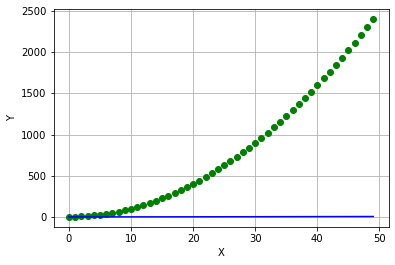

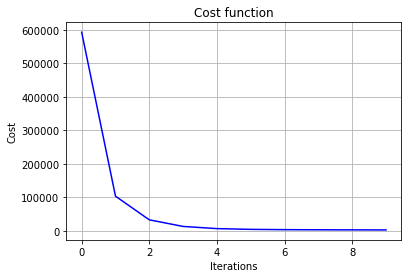

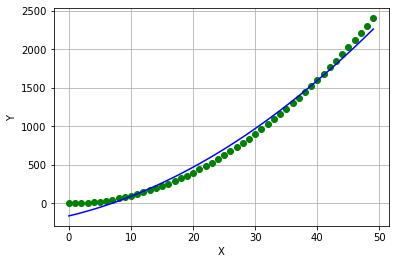

In [62]:
Run(itr=10, alpha = 0.8)